In [27]:
import torch
import torch.nn as nn
import numpy as np
import pytorch_lightning as pl
import sys 
import pandas as pd
import os
import optuna
import matplotlib.pylab as plt
%matplotlib inline
from lifelines.utils import concordance_index
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset
from torchcontrib.optim import SWA
from pytorch_lightning import Trainer, seed_everything
from argparse import ArgumentParser
sys.path.append('../../data/')
sys.path.append('../../data/ml_mmrf')
sys.path.append('../../data/synthetic')
sys.path.append('../../data/semi_synthetic')
sys.path.append('..')
sys.path.append('../models/')
# from ml_mmrf.ml_mmrf_v1.data import load_mmrf
from ml_mmrf.data import load_mmrf
from synthetic_data import load_synthetic_data_trt, load_synthetic_data_noisy
from ss_data import *
from models.ssm.ssm import SSM, SSMAtt
from models.ssm.ssm_baseline import SSMBaseline
from models.rnn import GRU
from models.utils import *
from models.base import DataModule
from synthetic.synthetic_data import load_synthetic_data_trt
print(torch.__version__)

1.10.0+cu102


In [33]:
fold = 1
ddata = load_synthetic_data_trt(fold_span=[fold], nsamples = {"train":1000,"valid":1000,"test":200},distractor_dims_b=4,sigma_ys=0.7, include_line =True, alpha_1_complex = False, per_missing = 0., add_feats = 0, num_trt = 1, sub = True)

In [52]:
ddata[1]["train"].keys()

dict_keys(['b', 'x_orig', 'a', 'x', 'm', 'ys_seq', 'm_ys_seq', 'ce', 'subtype', 'subtype_oh'])

In [60]:
ddata[1]["train"]["ce"].shape

(1000, 1)

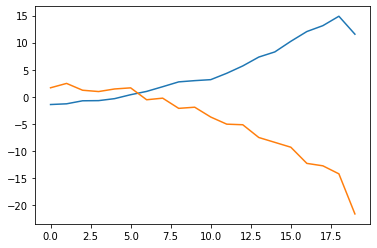

In [62]:
plt.plot(ddata[1]["train"]["x"][4])

In [59]:
ddata[1]["train"]["m_ys_seq"][4]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [12]:
hparams = {"fold" : 0, "dataset":"synthetic", "nsamples_syn":1000, "eval_type":"nelbo"}

In [24]:
trial = optuna.trial.FixedTrial({"bs":600,"lr":1e-3,"C":.01, "reg_all":"all", "reg_type":"l2", "dim_stochastic":48})
model = SSM(trial = trial, **hparams)
dm = DataModule(hparams,model= model)

In [25]:
dm.setup(stage = None)

training on 1000 samples


KeyError: 'ttype'